In [76]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [77]:

numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [78]:
#targets.head()
targets.shape
#targets.isna().sum()
numerical.shape
#categorical.shape

(95412, 315)

In [79]:
targets.TARGET_B.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [80]:
data1 = pd.concat([numerical, categorical, targets], axis = 1)
data1.isna().sum().sum()

0

In [81]:
dd = data1['TARGET_D']

In [82]:
data= data1.drop(['TARGET_D'], axis=1).copy()

In [83]:
display(data.shape)
data.head()

(95412, 338)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,

### Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.

#### get your target and independent variables

In [84]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [85]:
# Get numericals and categoricals
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

In [86]:
#usually, onehot encoding is not necessary for decision tree, however a different model might use the same data, hence just onehot encode
# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later (in the lab).

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)


# train/test/split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### checking imbalance in Target column

In [87]:
data["TARGET_B"].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

### Using oversampling

#### oversampling / undersampling is only to be done on the TRAINING set

In [88]:
trainset = pd.concat([X_train, y_train],axis=1)
#trainset.head()
#put values of the target column of the df into categories
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]
display(category_0.shape)
display(category_1.shape)

(72486, 355)

(3843, 355)

In [89]:
from sklearn.utils import resample
# To oversample, use (category_1) which is the smaller or in  minority

category_1_oversampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
# both sets are now of a reasonable size
display(category_0.shape)
display(category_1_oversampled.shape)

(72486, 355)

(72486, 355)

In [90]:
oversampled_data = pd.concat([category_0, category_1_oversampled], axis = 0)
#trainset_new = trainset_new.sample(frac =1) #randomize the rows

In [91]:
X_train_oversampled = oversampled_data.drop(['TARGET_B'], axis=1)
y_train_oversampled = oversampled_data['TARGET_B']
print(X_train.shape)

(76329, 354)


##### check score without random forest

## By applying Random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)


clf.fit(X_train_oversampled, y_train_oversampled)
print(clf.score(X_train_oversampled,y_train_oversampled))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.622451231962034
0.6092857517161872


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[11087,  6996],
       [  460,   540]], dtype=int64)

## Using Recursive Feature Elimination

In [93]:
numericalX = X.select_dtypes(np.number)

In [94]:
##### using minimax scaler
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(numericalX)
numericalX_scaled = transformer.transform(numericalX)
numericalX_scaled = pd.DataFrame(numericalX_scaled, columns=list(numericalX.columns))
#numericalX_scaled

In [95]:
#from sklearn.linear_model import LogisticRegression


#X=numericalX_scaled

#y = targets['TARGET_B']  # The target is target_D

#from sklearn.feature_selection import RFE
#from sklearn import linear_model
#LR = LogisticRegression(random_state=0, solver='lbfgs')
#rfe = RFE(LR, n_features_to_select=20, verbose=False) # lm tells (rfe) to use all features and build several linear models.
#rfe.fit(X, y)

In [96]:
#df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
#df['Column_name'] = pd.DataFrame(X).columns
#df[df['Rank']==1]

In [97]:
#good_features = df[df['Rank']==1]
#good_features

In [98]:
#good_features.to_csv('good_features.csv', index=False)

In [99]:
good_features = pd.read_csv('numerical.csv')

In [100]:
#good_features = good_features['Column_name'].tolist()


In [101]:
good_features = [['POP901',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'DW3',
 'DW4',
 'DW5',
 'HUPA1',
 'HUPA2',
 'MC1',
 'MC2',
 'TPE3',
 'TPE4',
 'TPE5',
 'TPE6',
 'RAMNTALL',
 'NGIFTALL',
 'AVGGIFT',
 'ODATEW_MM']]

In [102]:
good_features  = numericalX_scaled[['POP901','POP903','POP90C1','POP90C2','POP90C3', 'DW3',
 'DW4',
 'DW5',
 'HUPA1',
 'HUPA2',
 'MC1',
 'MC2',
 'TPE3',
 'TPE4',
 'TPE5',
 'TPE6',
 'RAMNTALL',
 'NGIFTALL',
 'AVGGIFT',
 'ODATEW_MM']]
good_features

,POP901,POP903,POP90C1,POP90C2,POP90C3,DW3,DW4,DW5,HUPA1,HUPA2,MC1,MC2,TPE3,TPE4,TPE5,TPE6,RAMNTALL,NGIFTALL,AVGGIFT,ODATEW_MM
0,0.010051,0.009378,0.000000,0.353535,0.656566,0.020202,0.020202,0.000000,0.020202,0.000000,0.464646,0.545455,0.000000,0.000000,0.0,0.0,0.023965,0.127119,0.006465,0.0
1,0.036585,0.028190,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.565657,0.444444,0.000000,0.000000,0.0,0.0,0.003590,0.008475,0.014399,0.0
2,0.070931,0.075389,0.000000,0.020202,0.989899,0.010101,0.060606,0.050505,0.040404,0.020202,0.383838,0.626263,0.000000,0.000000,0.0,0.0,0.019954,0.110169,0.006204,0.0
3,0.006484,0.006186,0.000000,0.080808,0.929293,0.030303,0.040404,0.010101,0.040404,0.000000,0.464646,0.545455,0.000000,0.000000,0.0,0.0,0.010135,0.063559,0.005534,0.0
4,0.025532,0.021495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202020,0.808081,0.010101,0.010101,0.0,0.0,0.025443,0.152542,0.005586,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.277403,0.283507,1.000000,0.000000,0.000000,0.080808,0.323232,0.242424,0.242424,0.080808,0.636364,0.373737,0.020202,0.020202,0.0,0.0,0.001267,0.000000,0.023745,0.0
95408,0.012705,0.010197,0.969697,0.000000,0.040404,0.010101,0.010101,0.000000,0.010101,0.000000,0.838384,0.171717,0.040404,0.040404,0.0,0.0,0.000739,0.000000,0.018738,0.0
95409,0.005593,0.005790,1.000000,0.000000,0.000000,0.010101,0.020202,0.010101,0.020202,0.000000,0.434343,0.575758,0.000000,0.000000,0.0,0.0,0.004751,0.025424,0.007009,0.0
95410,0.017690,0.014349,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434343,0.575758,0.000000,0.000000,0.0,0.0,0.051204,0.169492,0.010875,0.0


In [103]:
data_scaled_RFE =  pd.concat([good_features, encoded_categorical, y], axis=1).reset_index()
data_scaled_RFE

,index,POP901,POP903,POP90C1,POP90C2,POP90C3,DW3,DW4,DW5,HUPA1,HUPA2,MC1,MC2,TPE3,TPE4,TPE5,TPE6,RAMNTALL,NGIFTALL,AVGGIFT,ODATEW_MM,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,TARGET_B
0,0,0.010051,0.009378,0.000000,0.353535,0.656566,0.020202,0.020202,0.000000,0.020202,0.000000,0.464646,0.545455,0.000000,0.000000,0.0,0.0,0.023965,0.127119,0.006465,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,1,0.036585,0.028190,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.565657,0.444444,0.000000,0.000000,0.0,0.0,0.003590,0.008475,0.014399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,2,0.070931,0.075389,0.000000,0.020202,0.989899,0.010101,0.060606,0.050505,0.040404,0.020202,0.383838,0.626263,0.000000,0.000000,0.0,0.0,0.019954,0.110169,0.006204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,3,0.006484,0.006186,0.000000,0.080808,0.929293,0.030303,0.040404,0.010101,0.040404,0.000000,0.464646,0.545455,0.000000,0.000000,0.0,0.0,0.010135,0.063559,0.005534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,4,0.025532,0.021495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202020,0.808081,0.010101,0.010101,0.0,0.0,0.025443,0.152542,0.005586,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,0.277403,0.283507,1.000000,0.000000,0.000000,0.080808,0.323232,0.242424,0.242424,0.080808,0.636364,0.373737,0.020202,0.020202,0.0,0.0,0.001267,0.000000,0.023745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
95408,95408,0.012705,0.010197,0.969697,0.000000,0.040404,0.010101,0.010101,0.000000,0.010101,0.000000,0.838384,0.171717,0.040404,0.040404,0.0,0.0,0.000739,0.000000,0.018738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
95409,95409,0.005593,0.005790,1.000000,0.000000,0.000000,0.010101,0.020202,0.010101,0.020202,0.000000,0.434343,0.575758,0.000000,0.000000,0.0,0.0,0.004751,0.025424,0.007009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
95410,95410,0.017690,0.014349,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.434343,0.575758,0.000000,0.000000,0.0,0.0,0.051204,0.169492,0.010875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Oversample and e random forest on values of "data_scaled_pca" and 
### compare results with that of withot feature elimination

In [104]:
X = data_scaled_RFE .drop(['TARGET_B'], axis = 1)
y = data_scaled_RFE ['TARGET_B']

# Get numericals and categoricals
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Oversample RFE

In [105]:
trainset = pd.concat([X_train, y_train],axis=1)
#trainset.head()
#put values of the target column of the df into categories
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]
display(category_0.shape)
display(category_1.shape)

from sklearn.utils import resample
# To oversample, use (category_1) which is the smaller or in  minority

category_1_oversampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
# both sets are now of a reasonable size
display(category_0.shape)
display(category_1_oversampled.shape)

oversampled_data = pd.concat([category_0, category_1_oversampled], axis = 0)

X_train_oversampled = oversampled_data.drop(['TARGET_B'], axis=1)
y_train_oversampled = oversampled_data['TARGET_B']
print(X_train.shape)


(72486, 46)

(3843, 46)

(72486, 46)

(72486, 46)

(76329, 45)


### Get your-scores using rainforest

In [106]:
### Rain forest and confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)


clf.fit(X_train_oversampled, y_train_oversampled)
print(clf.score(X_train_oversampled,y_train_oversampled))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.5951080208592004
0.5748048000838443


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10416,  7667],
       [  447,   553]], dtype=int64)

In [107]:
#df = pd.DataFrame(good_features, columns=list(good_features.columns))

In [108]:
#drop_list =[]
#for col_name in categorical.columns:
    #if "RFA" in col_name:
       # drop_list.append(col_name)
    #Except 

# Using PCA

In [109]:
from sklearn.decomposition import PCA
#calling the pca
pca = PCA()
pca.fit(numericalX_scaled)  #calling PCA looks much like training a model model

PCA()

In [160]:
#pca.explained_variance_ratio_.round(2)

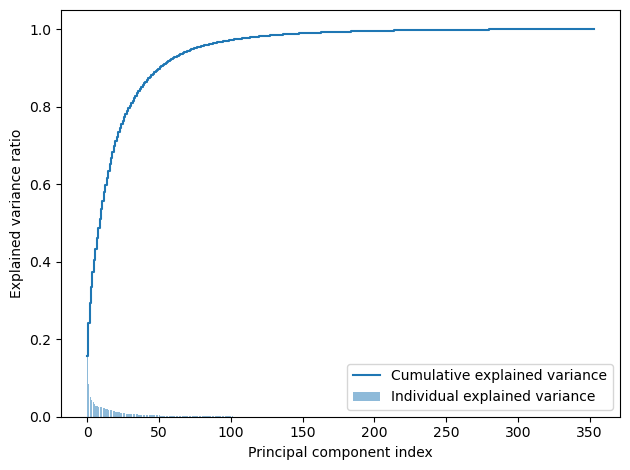

In [111]:
import numpy as np
import matplotlib.pyplot as plt
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [112]:
#0 to 14 captures 98.3% of information in the dataset
pca.explained_variance_ratio_[:90].sum() 

0.965024830492196

In [113]:
#choose the best dimensions
pca = PCA(90)
pca.fit(numericalX_scaled)

PCA(n_components=90)

In [114]:
#use pca as transformer i.e pca = PCA(7)
numericalX_scaled_pca = pca.transform(numericalX_scaled)
numericalX_scaled_pca

array([[ 1.12983512, -0.48036134, -0.75661923, ..., -0.02918499,
         0.04442869, -0.08787545],
       [-2.56934238, -1.59236984, -0.35824963, ..., -0.0096571 ,
         0.13071919,  0.11680469],
       [ 2.06682209, -0.58762849,  0.2524156 , ...,  0.08302432,
         0.020587  , -0.0149971 ],
       ...,
       [ 0.16277066,  0.91217368, -1.46962546, ..., -0.05601323,
        -0.0326419 ,  0.05222682],
       [-1.80685246, -0.87668573, -0.7302552 , ..., -0.12451364,
         0.02505699,  0.0532998 ],
       [-0.82224658, -1.01560792,  0.37476603, ..., -0.04292192,
         0.03967537,  0.06842979]])

In [115]:
#put numericalX_scaled_pca into dataframe
numericalX_scaled_pca = pd.DataFrame(numericalX_scaled_pca)

In [116]:
#now join with onehot encoded X_cat

In [117]:

data_scaled_pca = pd.concat([numericalX_scaled_pca, encoded_categorical, y], axis=1)

#### use random forest on values of "data_scaled_pca" and compare results with that of withot feature elimination

In [118]:
X = data_scaled_pca .drop(['TARGET_B'], axis = 1)
y = data_scaled_pca ['TARGET_B']

# Get numericals and categoricals
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Oversampling again for data_scaled_pca

In [119]:
trainset = pd.concat([X_train, y_train],axis=1)
#trainset.head()
#put values of the target column of the df into categories
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]
display(category_0.shape)
display(category_1.shape)

from sklearn.utils import resample
# To oversample, use (category_1) which is the smaller or in  minority

category_1_oversampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
# both sets are now of a reasonable size
display(category_0.shape)
display(category_1_oversampled.shape)

oversampled_data = pd.concat([category_0, category_1_oversampled], axis = 0)

X_train_oversampled = oversampled_data.drop(['TARGET_B'], axis=1)
y_train_oversampled = oversampled_data['TARGET_B']
print(X_train.shape)


(72486, 115)

(3843, 115)

(72486, 115)

(72486, 115)

(76329, 114)


In [120]:
### Rain forest and confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf_pca = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)


clf_pca.fit(X_train_oversampled, y_train_oversampled)
print(clf_pca.score(X_train_oversampled,y_train_oversampled))
print(clf_pca.score(X_test, y_test))

pred_clf_pca = clf_pca.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6122906492288166
0.6343342241785883


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10416,  7667],
       [  447,   553]], dtype=int64)

In [121]:
import pickle
pickle.dump(clf_pca, open('clf_pca.pkl', 'wb'))

 


# Difference not so much

# Lab | Final regression model in "Health Care for All" Case

In [146]:
numerical_donated = pd.read_csv('numerical.csv')
categorical_donated = pd.read_csv('categorical.csv')
targets_donated = pd.read_csv('target.csv')

In [147]:
data= pd.concat([numerical, categorical, targets], axis = 1)

In [148]:
donated = data[data['TARGET_B'] ==1]

In [149]:
donated.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.0,15,10,2.0,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,87,1,36,1,88,1,94,4,96,3,87,1,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.0,11,6,2.0,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,90,1,0,2,90,4,93,1,95,12,90,4,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,9

In [194]:
y = donated['TARGET_D']
X = donated.drop(['TARGET_D','TARGET_B'], axis = 1)


# Test, train, split

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Get categoricals and numericals

In [196]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)


In [201]:
X_train_num  = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [203]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)            #1. Use the standard scaler to fit X_train_num
X_train_standardized = transformer.transform(X_train_num)   #2a. use the transformer to transform (X_train_num)
X_test_standardized = transformer.transform(X_test_num)     #2b.use the transformer to transform (X_test_num)
pd.DataFrame(X_train_standardized).head()

#Put the transformed into dataframes
X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized = pd.DataFrame(X_test_standardized)


### onehot encode categoricals

In [204]:
#using onehot encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat) #1. Use onehot encoder to fit the X_train_cat
onehot_X_train_cat_encoded = encoder.transform(X_train_cat).toarray()   #2a. transform the X_train_cat with the encoder
onehot_X_test_cat_encoded = encoder.transform(X_test_cat).toarray()  #2b. transform the X_test_cat with the encoder
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
cols1 = encoder.get_feature_names_out(input_features=X_test_cat.columns)

# Put the onehot encoded in a dataframe
onehot_X_test_cat_encoded = pd.DataFrame(onehot_X_test_cat_encoded, columns = cols1)
#display(onehot_X_test_cat_encoded)
onehot_X_train_cat_encoded = pd.DataFrame(onehot_X_train_cat_encoded, columns = cols)
onehot_X_train_cat_encoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Join the X_train_num and x_train cat and do same for the test

In [205]:
X_train = pd.concat((X_train_standardized, onehot_X_train_cat_encoded ), axis = 1)
#display(X_train)
X_test = pd.concat((X_test_standardized, onehot_X_test_cat_encoded), axis = 1)
#X_test

In [206]:
from sklearn import linear_model
# linear regression

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [207]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.6095586890061206

#### r^2 for X_test confirms if the Linear regression model is genuinely predicting

In [145]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.28955295013462423